In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
v_{c}^{2} = \frac{4G\Sigma_{g}R_{d}}{\pi} y^{2}\int_{0}^{\pi/2}(\cos(2u) + 1)du\int_{0}^{\infty}d\beta exp(-y\cos u\cosh\beta -\frac{R_{m}}{2*R_{d}y\cos u \cosh\beta})(\frac{R_{m}}{2R_{d}y^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}\pi}{4G\Sigma_{g}R_{d}} =  y^{2}\int_{0}^{\pi/2}(\cos(2u) + 1)du\int_{0}^{\infty}d\beta exp(-y\cos u\cosh\beta -\frac{R_{m}}{2*R_{d}y\cos u \cosh\beta})(\frac{R_{m}}{2R_{d}y^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$

donde $y = \frac{R}{2R_{d}}$, por lo que $v_{c}^{2}(R)$ es 
$$\begin{equation}
v_{c}^{2} = \frac{G\Sigma_{g}R^{2}}{\pi R_{d}}\int_{0}^{\pi/2}(\cos2u + 1)du\int_{0}^{\infty} d\beta exp(-\frac{R\cos u \cosh\beta}{2R_{d}} -\frac{R_{m}}{R\cos u \cosh\beta})(\frac{2R_{m}R_{d}}{R^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}\pi R_{d}}{G\Sigma_{g}} = R^{2}\int_{0}^{\pi/2}(\cos2u + 1)du\int_{0}^{\infty} d\beta exp(-\frac{R\cos u \cosh\beta}{2R_{d}} -\frac{R_{m}}{R\cos u \cosh\beta})(\frac{2R_{m}R_{d}}{R^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$

In [2]:
R = np.linspace(0.1,15.,100)

In [12]:
def func_R_I(u,beta,R,R_m=4.,R_d=2.):
    exp1 = np.exp(-(R*np.cos(u)*np.cosh(beta))/(2.*R_d))
    exp2 = np.exp(-R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return exp1*t1*t2*exp2*R**2.

In [14]:
fun = []
t = np.pi/2.-0.1
for i in range (0,len(R)):
    integ = lambda u,beta: func_R_I(u,beta,R[i])
    resul = integrate.dblquad(integ,0.1,np.pi/2.,lambda u: 0.1, lambda u: np.inf)[0]
    fun.append(resul)
print fun

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 9.380859177814076e+101, 5.0220435945109584e+98, 4.267138713792802e+95, 5.522337160423649e+92, 1.0495792608176021e+90, 2.836385884708926e+87, 1.058907149536895e+85, 5.322396865220267e+82, 3.5195356002583505e+80, 2.998995256822268e+78, 3.231835977198534e+76, 4.3306940355206266e+74, 7.106260263458468e+72, 1.408157291185326e+71, 3.327213385739584e+69, 9.266273860103171e+67, 3.009754188770873e+66, 1.1291468518288169e+65, 4.849549979673166e+63, 2.3650119812743113e+62, 1.299798066188126e+61, 7.994883011991178e+59, 5.468325114953398e+58, 4.134497343549117e+57, 3.4365790408712896e+56, 3.1242525790395393e+55, 3.0918597854675544e+54, 3.3161036871931323e+53, 3.8386878693469506e+52, 4.7776636185503546e+51, 6.370421256348525e+50, 9.069501712060987e+49, 1.374349965112003e+49, 2.21019997450111e+48, 3.761724092232859e+47, 6.758298106491106e+46, 1.2785693

In [15]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [16]:
vel_integral_I = np.array(fun)

In [18]:
C = (G*Sigma_g_ISM_I)/(np.pi*R_d_I)
vel = np.sqrt(C*vel_integral_I)
print vel

[           inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf 1.74897689e+52 4.04671857e+50
 1.17959017e+49 4.24350016e+47 1.84999427e+46 9.61712854e+44
 5.87613417e+43 4.16597242e+42 3.38770390e+41 3.12716396e+40
 3.24629078e+39 3.75786794e+38 4.81374763e+37 6.77623326e+36
 1.04160508e+36 1.73826237e+35 3.13276831e+34 6.06789388e+33
 1.25751589e+33 2.77702274e+32 6.51029557e+31 1.61461439e+31
 4.22269707e+30 1.16111202e+30 3.34754121e+29 1.00933616e+29
 3.17521150e+28 1.03986465e+28 3.53797014e+27 1.24816083e+27
 4.55771158e+26 1.71970707e+26 6.69439649e+25 2.68459358e+25
 1.10753187e+25 4.694414

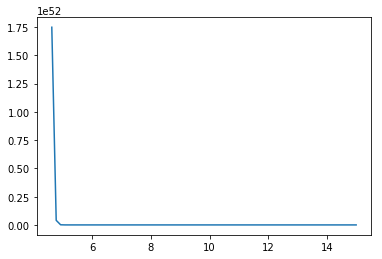

In [19]:
plt.plot(R,vel)

In [20]:
#Probar con el integrando con def function en vez de lambda

In [23]:
def func_R_II(u,beta,R,R_m=4.,R_d=3.2):
    exp1 = np.exp(-(R*np.cos(u)*np.cosh(beta))/(2.*R_d))
    exp2 = np.exp(-R_m/(R*np.cos(u)*np.cosh(beta)))
    t1 = (2.*R_m*R_d)/(R**2.*np.cos(u)**2.*np.cosh(beta)**2.) - 1.
    t2 = np.cos(2.*u) + 1.
    return exp1*t1*t2*exp2*R**2.

In [24]:
fun_II = []
t = np.pi/2.-0.1
for i in range (0,len(R)):
    integral_II = lambda u,beta: func_R_II(u,beta,R[i])
    resultado_II = integrate.dblquad(integral_II,0.1,np.pi/2.,lambda u: 0.1, lambda u: np.inf)[0]
    fun_II.append(resultado_II)
print fun_II

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1.4985895158219783e+102, 8.022290851962525e+98, 6.816046421909554e+95, 8.820568004927571e+92, 1.6763578485454737e+90, 4.5299631177722095e+87, 1.6910836564904835e+85, 8.499479473307015e+82, 5.62015511489428e+80, 4.7886884777575795e+78, 5.1602172557748175e+76, 6.91439280541339e+74, 1.1345288090721067e+73, 2.248037037500882e+71, 5.3114222113558605e+69, 1.4791532807125521e+68, 4.8041544164888536e+66, 1.802246710940355e+65, 7.740038807929787e+63, 3.774443519666655e+62, 2.074308569344921e+61, 1.2758143406472852e+60, 8.725846865415774e+58, 6.597112232630717e+57, 5.483216450779473e+56, 4.984631869151697e+55, 4.932699345008181e+54, 5.290185008218368e+53, 6.123552780817975e+52, 7.62103827524891e+51, 1.0161191499855798e+51, 1.4465645715675433e+50, 2.1919449769329363e+49, 3.524859406050844e+48, 5.9989478668791454e+47, 1.0777137291006713e+47, 2.03877

In [25]:
vel2arrayII = np.array(fun_II)
C = (G*Sigma_g_ISM_II)/(np.pi*R_d_II)
vel_II = np.sqrt(C*vel2arrayII)
print vel_II

[           inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf 9.26998479e+51 2.14480038e+50
 6.25178374e+48 2.24898186e+47 9.80440048e+45 5.09665234e+44
 3.11401158e+43 2.20766840e+42 1.79519582e+41 1.65708952e+40
 1.72017119e+39 1.99119916e+38 2.55061812e+37 3.59037166e+36
 5.51878010e+35 9.20967421e+34 1.65976329e+34 3.21473218e+33
 6.66207083e+32 1.47117434e+32 3.44885041e+31 8.55325493e+30
 2.23687374e+30 6.15055934e+29 1.77319040e+29 5.34631104e+28
 1.68182188e+28 5.50773589e+27 1.87386979e+27 6.61065889e+26
 2.41384842e+26 9.10765537e+25 3.54529600e+25 1.42170201e+25
 5.86509729e+24 2.485932

(0, 2e+30)

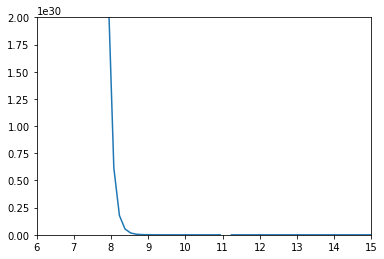

In [32]:
plt.plot(R,vel_II)
plt.xlim(6,15)
plt.ylim(0,2e30)